In [1]:
import numpy as np
import scipy.optimize
from autograd import jacobian
import matplotlib.pyplot as plt
import warnings
import random

In [2]:
warnings.filterwarnings(action='ignore')
random.seed(0)

<h1> Part 1 </h1>

In [3]:
alpha = np.random.random()
beta = np.random.random()
noise = np.random.normal(0, 1, 100)
epsilon = 0.001

x_k = np.arange(0, 1, 0.01)
y_k = [alpha * x_k[k] + beta + noise[k] for k in range(len(x_k))]

In [4]:
def linear_approximant(x, a, b):
    return a * x + b

def rational_approximant(x, a, b):
    return a / (1 + b * x)

In [5]:
def loss_function(x, function):
    amount = 0
    
    for i in range(100):
        amount = amount + np.power(function(x_k[i], x[0], x[1]) - y_k[i], 2)
    
    return amount

In [6]:

def gradient_descent(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='BFGS',
        args=(args,),
        tol=epsilon
    )

def conjugate_gradient_descent(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='CG',
        args=(args,),
        tol=epsilon
    )

def newtons_method(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='Newton-CG',
        jac=jacobian(function),
        args=(args,),
        tol=epsilon
    )

def levenberg_marquardt_algorithm(function, x, y):
    return scipy.optimize.curve_fit(
        function,
        xdata=x,
        ydata=y,
        method='lm'
    )

In [7]:
def gradient_descent(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='BFGS',
        args=(args,),
        tol=epsilon
    )

def conjugate_gradient_descent(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='CG',
        args=(args,),
        tol=epsilon
    )

def newtons_method(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='Newton-CG',
        jac=jacobian(function),
        args=(args,),
        tol=epsilon
    )

def levenberg_marquardt_algorithm(function, x, y):
    return scipy.optimize.curve_fit(
        function,
        xdata=x,
        ydata=y,
        method='lm'
    )

In [8]:
gradient_lower, gradient_higher = gradient_descent(loss_function, linear_approximant).x

print('Gradient descent arguments: {:.6f}, {:.6f}'.format(gradient_lower, gradient_higher))

Gradient descent arguments: 0.290920, 0.523337


In [9]:
conjugate_lower, conjugate_higher = conjugate_gradient_descent(loss_function, linear_approximant).x

print('Conjugate gradient descent arguments: {:.6f}, {:.6f}'.format(conjugate_lower, conjugate_higher))

Conjugate gradient descent arguments: 0.290920, 0.523336


In [10]:
newtons_lower, newtons_higher = newtons_method(loss_function, linear_approximant).x

print('Newtons method arguments: {:.6f}, {:.6f}'.format(newtons_lower, newtons_higher))

Newtons method arguments: 0.290920, 0.523336


In [11]:
levenberg_lower, levenberg_higher = levenberg_marquardt_algorithm(linear_approximant, x_k, y_k)[0]

print('Levenberg-Marquardt algorithm arguments: {:.6f}, {:.6f}'.format(levenberg_lower, levenberg_higher))

Levenberg-Marquardt algorithm arguments: 0.290920, 0.523336


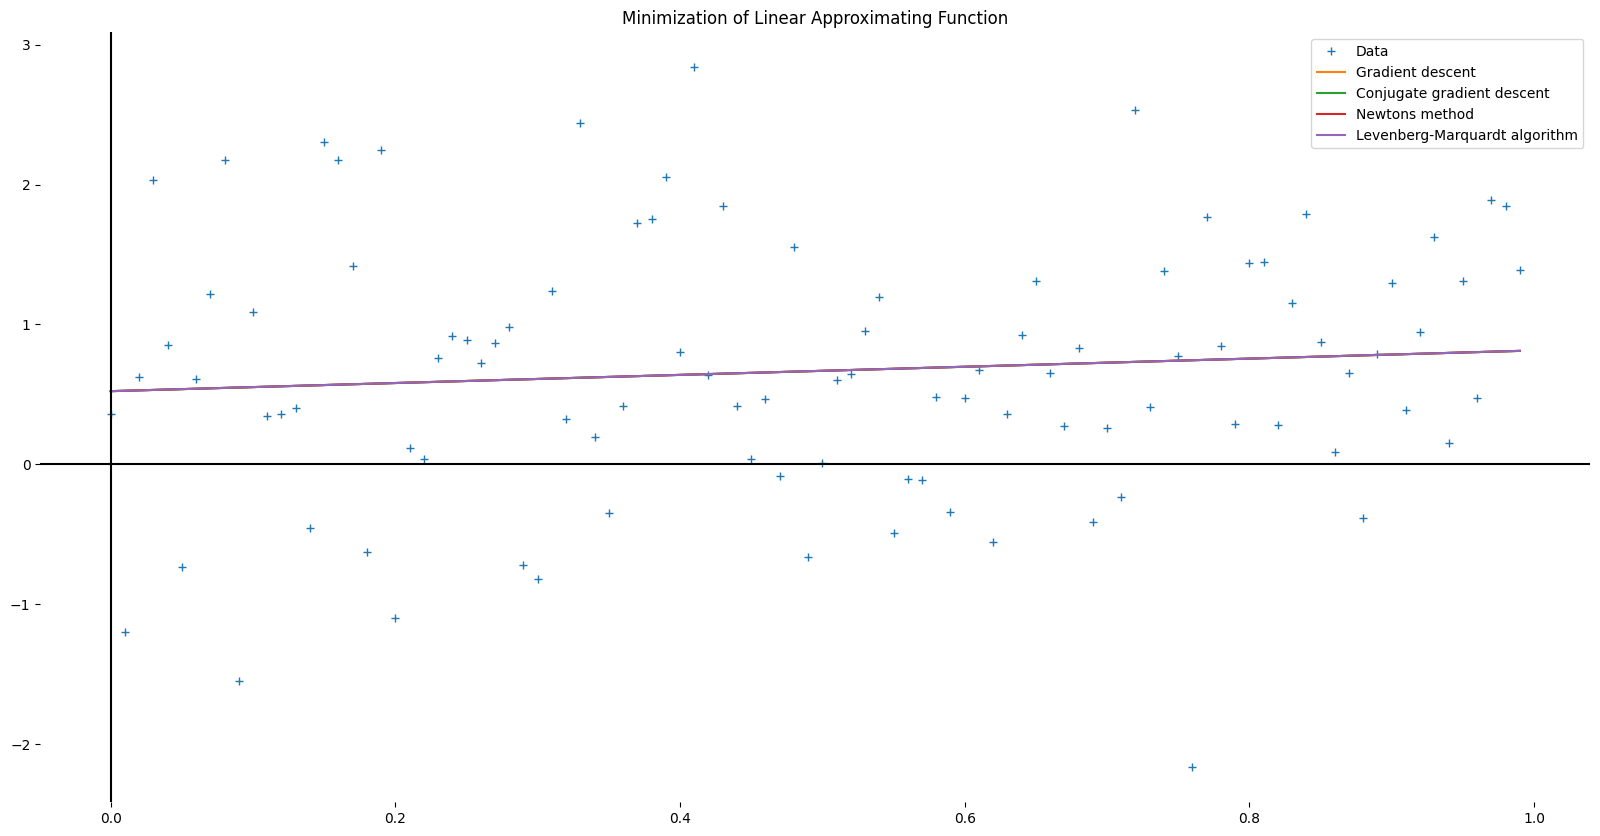

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [linear_approximant(x, gradient_lower, gradient_higher) for x in x_k]
plt.plot(x_k, y, label='Gradient descent')

y = [linear_approximant(x, conjugate_lower, conjugate_higher) for x in x_k]
plt.plot(x_k, y, label='Conjugate gradient descent')

y = [linear_approximant(x, newtons_lower, newtons_higher) for x in x_k]
plt.plot(x_k, y, label='Newtons method')

y = [linear_approximant(x, levenberg_lower, levenberg_higher) for x in x_k]
plt.plot(x_k, y, label='Levenberg-Marquardt algorithm')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Linear Approximating Function')
ax.legend()

plt.show()

In [13]:
gradient_lower, gradient_higher = gradient_descent(loss_function, rational_approximant).x

print('Gradient descent arguments: {:.6f}, {:.6f}'.format(gradient_lower, gradient_higher))

Gradient descent arguments: 0.503799, -0.445188


In [14]:
conjugate_lower, conjugate_higher = conjugate_gradient_descent(loss_function, rational_approximant).x

print('Conjugate gradient descent arguments: {:.6f}, {:.6f}'.format(conjugate_lower, conjugate_higher))

Conjugate gradient descent arguments: 0.503814, -0.445156


In [15]:
newtons_lower, newtons_higher = newtons_method(loss_function, rational_approximant).x

print('Newtons method arguments: {:.6f}, {:.6f}'.format(newtons_lower, newtons_higher))

Newtons method arguments: 0.501892, -0.449174


In [16]:
levenberg_lower, levenberg_higher = levenberg_marquardt_algorithm(rational_approximant, x_k, y_k)[0]

print('Levenberg-Marquardt algorithm arguments: {:.6f}, {:.6f}'.format(levenberg_lower, levenberg_higher))

Levenberg-Marquardt algorithm arguments: 0.503859, -0.445054


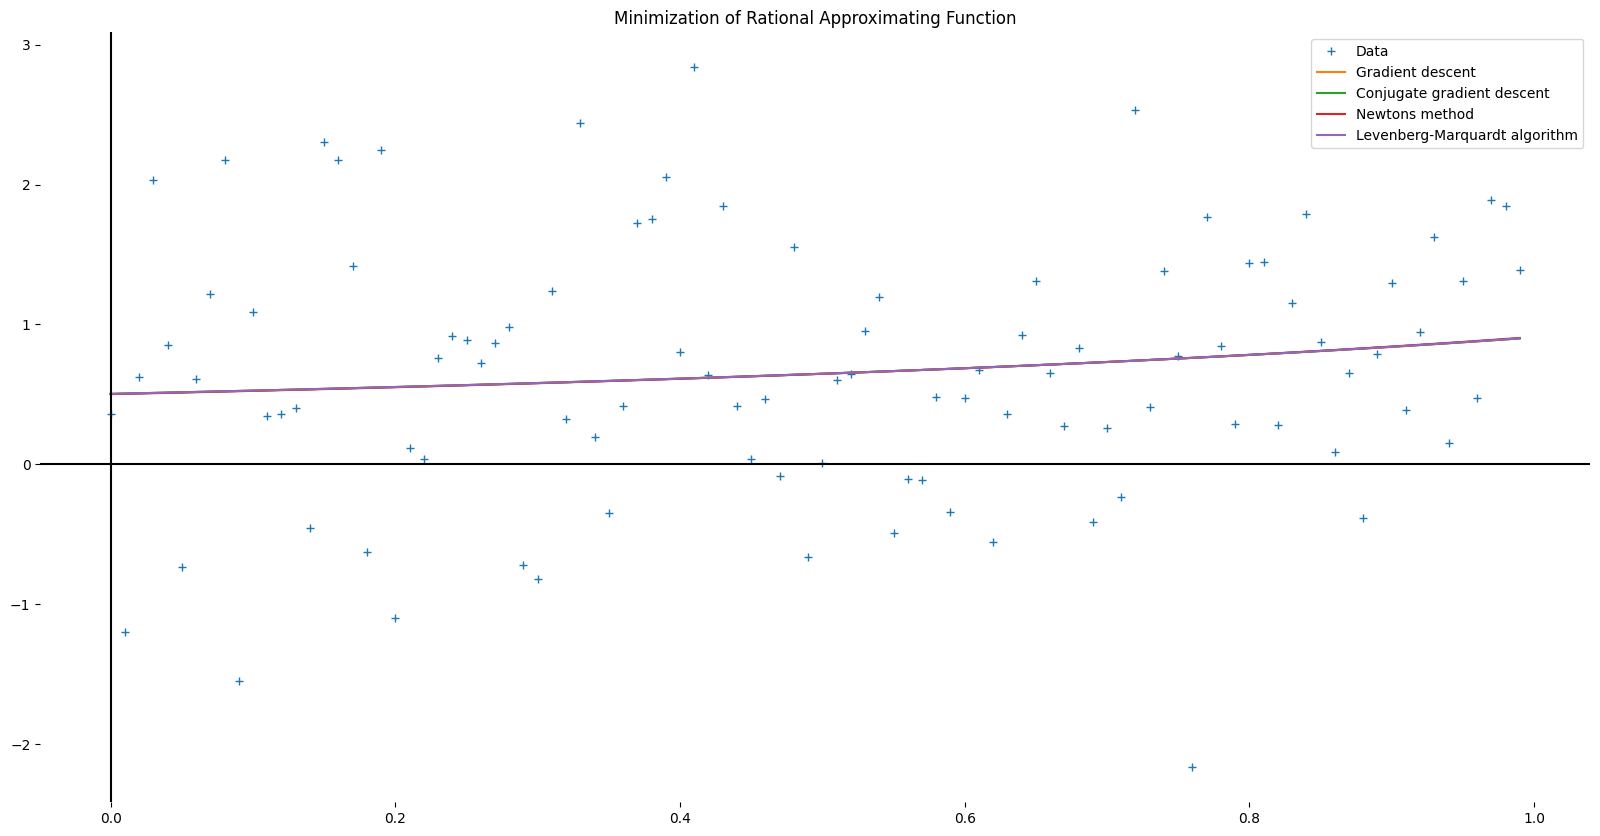

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [rational_approximant(x, gradient_lower, gradient_higher) for x in x_k]
plt.plot(x_k, y, label='Gradient descent')

y = [rational_approximant(x, conjugate_lower, conjugate_higher) for x in x_k]
plt.plot(x_k, y, label='Conjugate gradient descent')

y = [rational_approximant(x, newtons_lower, newtons_higher) for x in x_k]
plt.plot(x_k, y, label='Newtons method')

y = [rational_approximant(x, levenberg_lower, levenberg_higher) for x in x_k]
plt.plot(x_k, y, label='Levenberg-Marquardt algorithm')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Rational Approximating Function')
ax.legend()

plt.show()

In [38]:
def exhaustive_search(function, args):
    return scipy.optimize.brute(
        function,
        ranges=(slice(0, 1, epsilon), (slice(0, 1, epsilon))),
        args=(args,)
    )

def gauss_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        bounds=[(0, 1), (0, 1)],
        method='CG',
        args=(args,)
    )

def neldermead_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        bounds=[(0, 1), (0, 1)],
        method='Nelder-Mead',
        args=(args,)
    )

In [39]:
exhaustive_lower, exhaustive_higher = exhaustive_search(loss_function, linear_approximant)

print('Exhaustive search arguments: {:.6f}, {:.6f}'.format(exhaustive_lower, exhaustive_higher))

Exhaustive search arguments: 0.290889, 0.523347


In [40]:
gauss_lower, gauss_higher = gauss_search(loss_function, linear_approximant).x

print('Gauss search arguments: {:.6f}, {:.6f}'.format(gauss_lower, gauss_higher))

Gauss search arguments: 0.290920, 0.523336


In [36]:
neldermead_lower, neldermead_higher = neldermead_search(loss_function, linear_approximant).x

print('Nelder-Mead search arguments: {:.6f}, {:.6f}'.format(neldermead_lower, neldermead_higher))

Nelder-Mead search arguments: 0.290943, 0.523325


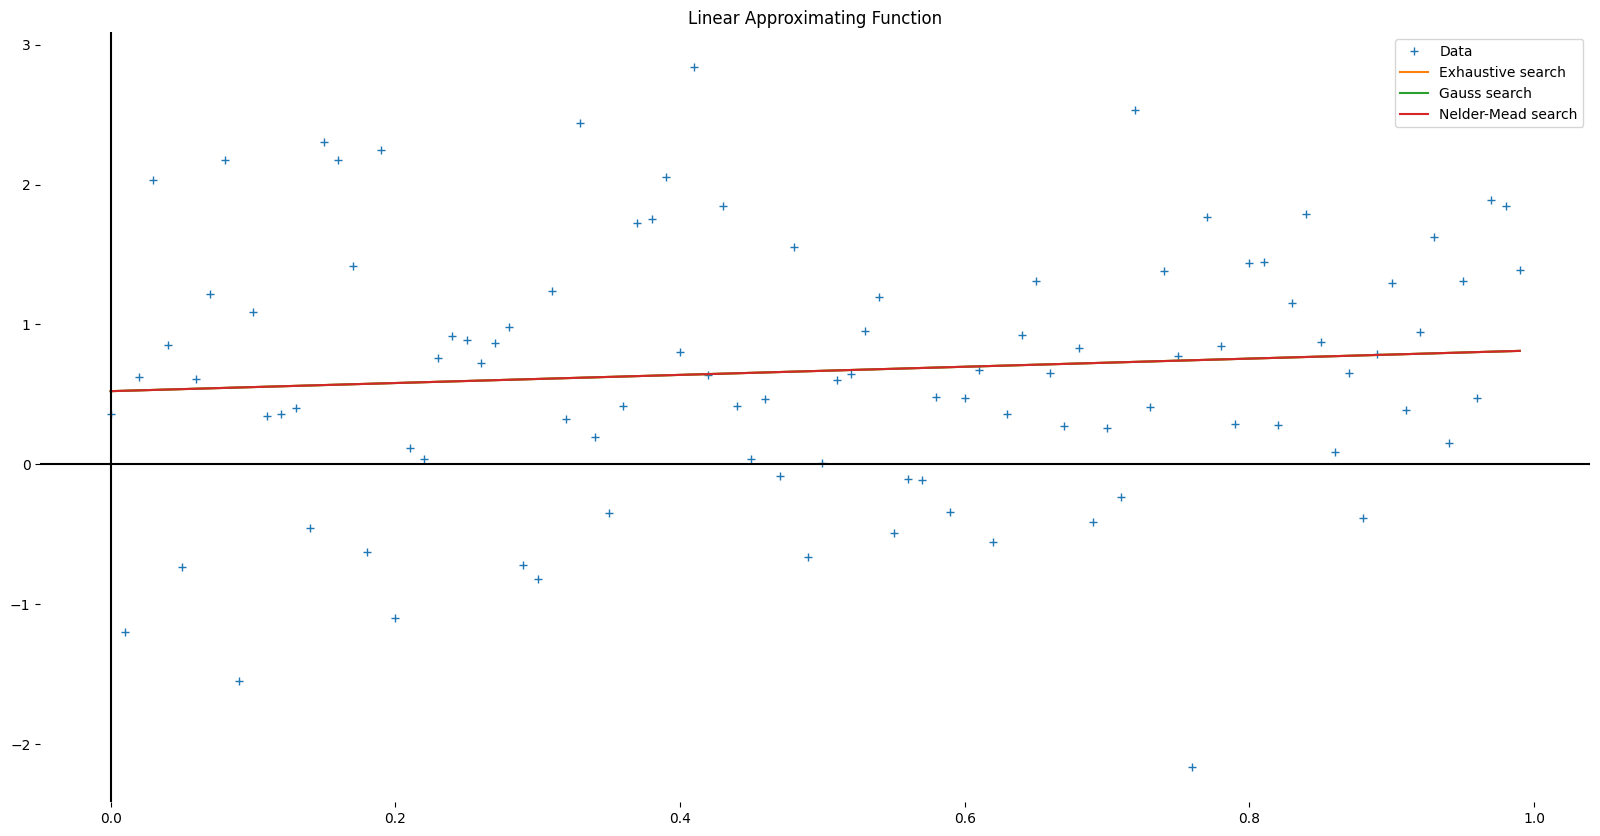

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [linear_approximant(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive search')

y = [linear_approximant(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss search')

y = [linear_approximant(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Linear Approximating Function')
ax.legend()

plt.show()

In [45]:
exhaustive_lower, exhaustive_higher = exhaustive_search(loss_function, rational_approximant)

print('Exhaustive search arguments: {:.6f}, {:.6f}'.format(exhaustive_lower, exhaustive_higher))

Exhaustive search arguments: 0.503785, -0.445197


In [46]:
gauss_lower, gauss_higher = gauss_search(loss_function, rational_approximant).x

print('Gauss search arguments: {:.6f}, {:.6f}'.format(gauss_lower, gauss_higher))

Gauss search arguments: 0.503798, -0.445190


In [47]:
neldermead_lower, neldermead_higher = neldermead_search(loss_function, rational_approximant).x

print('Nelder-Mead search arguments: {:.6f}, {:.6f}'.format(neldermead_lower, neldermead_higher))

Nelder-Mead search arguments: 0.667313, 0.000000


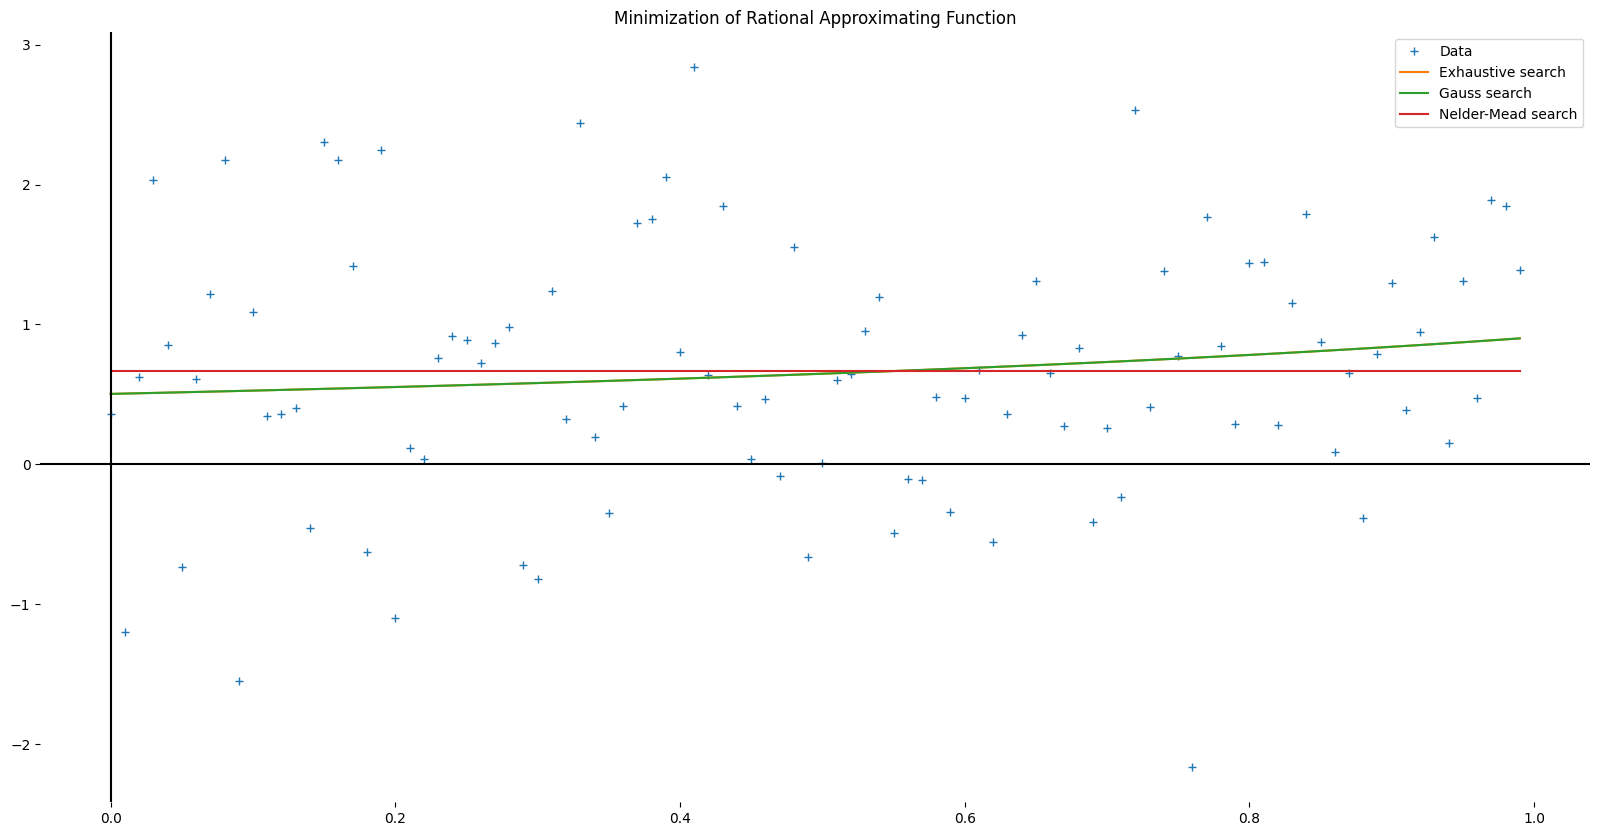

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [rational_approximant(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive search')

y = [rational_approximant(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss search')

y = [rational_approximant(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Rational Approximating Function')
ax.legend()

plt.show()